In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
TRAIN_LABEL_DIR = '../datasets/train_labels.csv'
# TEST_DIR = '../datasets/test_images.npy'
TRAIN_DIR_PRE = '../datasets/train_images_preprocessed.npy'
TEST_DIR_PRE = '../datasets/test_images_preprocessed.npy'
IMG_SIZE = 35

In [13]:
train_raw = np.load(TRAIN_DIR_PRE, encoding = 'latin1')
final_test = np.load(TEST_DIR_PRE,encoding='latin1')

train_labels = np.array(pd.read_csv(TRAIN_LABEL_DIR, delimiter=","))
le = preprocessing.LabelEncoder()
train_y = le.fit_transform(train_labels[:,1])

train_x = train_raw[:,1]
# train_data = []
# for i in range(len(train_labels)):
#     train_data.append([np.array(train_x[i]), encoded[0]])

In [22]:
train = train_x[:8000]
train_y = train_labels[:8000]
valid = train_x[8000:9000]
valid_y = train_labels[8000:9000]
test = train_x[9000:]
test_y = train_labels[9000:]
# final_test = final_test[:,1]

In [15]:
final_test = final_test[:,1]

In [33]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [23]:
train_y[0]

25

In [39]:
train_y[0]

25

In [46]:
import pandas as pd

In [101]:
def printknn(neigh, metric, train_acc,valid_acc, test_acc):
    print(" k = "+str(neigh)+", p = "+ str(metric)+", train_acc "+str(train_acc)+", valid_acc = "+ str(valid_acc)+", test_acc = "+str(test_acc))

In [64]:
printknn(1,1,1,1)

 k = 1, metric = 1, valid_acc = 1, test_acc = 1


In [102]:
res = pd.DataFrame(columns=['neighbors', 'p', 'val_acc', 'test_acc'])
for i in range(1,10):
    for p in range(1,3):
        clf = KNeighborsClassifier(n_neighbors=i,p=p,algorithm='brute')
        clf.fit(list(train),train_y)
        acc_train = clf.score(list(train),train_y)
        acc_test = clf.score(list(test),test_y)
        acc_val = clf.score(list(valid),valid_y)
        res = res.append({'neighbors':i,
                          'p':p,
                          'val_acc':acc_val,
                          'test_acc':acc_test},ignore_index=True)
        printknn(i,p,acc_train,acc_val,acc_test)

 k = 1, p = 1, train_acc 1.0, valid_acc = 0.404, test_acc = 0.384
 k = 1, p = 2, train_acc 1.0, valid_acc = 0.384, test_acc = 0.343
 k = 2, p = 1, train_acc 0.673625, valid_acc = 0.385, test_acc = 0.352
 k = 2, p = 2, train_acc 0.6665, valid_acc = 0.361, test_acc = 0.329
 k = 3, p = 1, train_acc 0.627875, valid_acc = 0.396, test_acc = 0.395
 k = 3, p = 2, train_acc 0.61125, valid_acc = 0.386, test_acc = 0.359
 k = 4, p = 1, train_acc 0.6035, valid_acc = 0.422, test_acc = 0.404
 k = 4, p = 2, train_acc 0.585625, valid_acc = 0.404, test_acc = 0.374
 k = 5, p = 1, train_acc 0.579625, valid_acc = 0.433, test_acc = 0.41
 k = 5, p = 2, train_acc 0.56475, valid_acc = 0.405, test_acc = 0.395
 k = 6, p = 1, train_acc 0.569125, valid_acc = 0.436, test_acc = 0.412
 k = 6, p = 2, train_acc 0.5485, valid_acc = 0.409, test_acc = 0.392
 k = 7, p = 1, train_acc 0.5545, valid_acc = 0.433, test_acc = 0.409
 k = 7, p = 2, train_acc 0.533125, valid_acc = 0.411, test_acc = 0.396
 k = 8, p = 1, train_acc 0.

In [68]:
import matplotlib.pyplot as plt

In [72]:
res[res['p'] == 1]

,neighbors,p,val_acc,test_acc
0,1.0,1.0,0.404,0.384
2,2.0,1.0,0.385,0.352
4,3.0,1.0,0.396,0.395
6,4.0,1.0,0.422,0.404
8,5.0,1.0,0.433,0.410
10,6.0,1.0,0.436,0.412
12,7.0,1.0,0.433,0.409
14,8.0,1.0,0.431,0.416
16,9.0,1.0,0.435,0.419


In [103]:
x = np.arange(1,10)
y1 = list(res[res['p'] == 1]['val_acc'])
y2 = list(res[res['p'] == 1]['test_acc'])
y3 = list(res[res['p'] == 2]['val_acc'])
y4 = list(res[res['p'] == 2]['test_acc'])

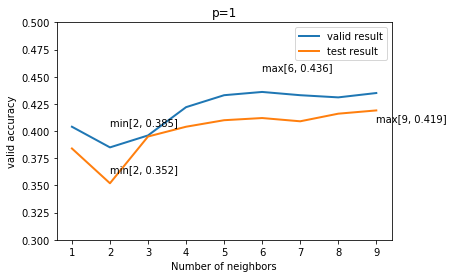

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)

line, = ax.plot(x, y1, lw=2,label='valid result')
line2, = ax.plot(x, y2, lw=2,label='test result')
min_v = min(y1)
max_v = max(y1)
min_v_test = min(y2)
max_v_test = max(y2)

for k,v in zip(x,y1):
    if v == min_v:
        ax.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
    elif v == max_v:
        ax.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
        
for k,v in zip(x,y2):
    if v == min_v_test:
        ax.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.01))
    elif v == max_v_test:
        ax.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v-0.01))
ax.set_ylim(0.3,0.5)
ax.set_ylabel('valid accuracy')
ax.set_xlabel('Number of neighbors')
ax.set_title('p=1')

ax.legend()

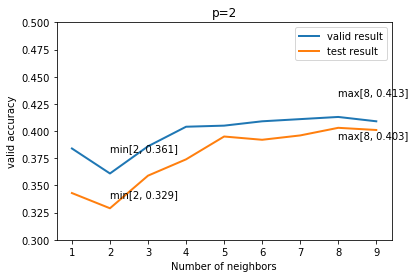

In [107]:
fig = plt.figure()
bx = fig.add_subplot(111)
line, = bx.plot(x, y3, lw=2,label='valid result')
line2, = bx.plot(x, y4, lw=2,label='test result')
min_v = min(y3)
max_v = max(y3)
min_v_test = min(y4)
max_v_test = max(y4)

for k,v in zip(x,y3):
    if v == min_v:
        bx.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
    elif v == max_v:
        bx.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
        
for k,v in zip(x,y4):
    if v == min_v_test:
        bx.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.01))
    elif v == max_v_test:
        bx.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v-0.01))
bx.set_ylim(0.3,0.5)
bx.set_ylabel('valid accuracy')
bx.set_xlabel('Number of neighbors')
bx.set_title('p=2')
bx.legend()

We focus on tuning number of neighbors and the distance calculation formular in the hyper-parameter tuning step. Model is validated on the 20% held out validation set. The best performance model considers only the nearest neighbor and using manhattan distance to calculate the distance.

In [64]:
test_acc = neigh.score(test_x,test_y)

In [65]:
test_acc

0.398

In [ ]:
valid_acc = neigh.score(valid_x,valid_y)
test_acc = neigh.score(test_x,test_y)